## Lab 1: Базові алгоритми класифікації з використанням бібліотеки Scikit-learn

### FB-41mn Shanidze Davyd

In [1]:
# All of our imports
import pandas as pd
import os

### Let's download the dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/teebeeaf/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [4]:
data = pd.read_csv(os.path.join(path, "gym_members_exercise_tracking.csv"))
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
print("Columns:", data.columns)
print("Dataset shape:", data.shape)

Columns: Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')
Dataset shape: (973, 15)


In [12]:
# Check for missing values
print(data.isnull().sum())

# Filling missing values by the median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Drop rows with missing categorical values
data = data.dropna()
data.head()

correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

correlation_matrix

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


<AxesSubplot: >

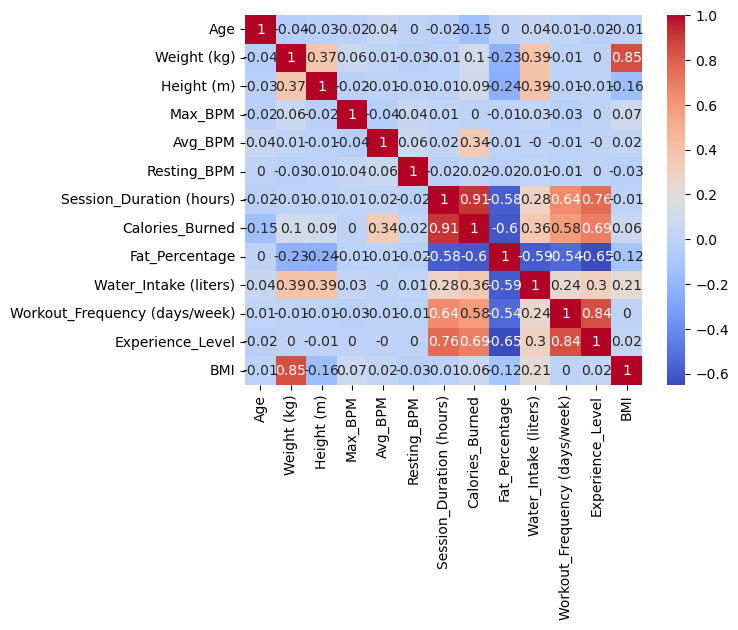

In [13]:
import seaborn as sns
sns.heatmap(correlation_matrix.round(2), annot = True, cmap = 'coolwarm')

In [16]:
data.corr()[['Calories_Burned']].sort_values(by = ['Calories_Burned'], ascending = False)

/tmp/ipykernel_12699/2511435930.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()[['Calories_Burned']].sort_values(by = ['Calories_Burned'], ascending = False)


,Calories_Burned
Calories_Burned,1.000000
Session_Duration (hours),0.908140
Experience_Level,0.694129
Workout_Frequency (days/week),0.576150
Water_Intake (liters),0.356931
Avg_BPM,0.339659
Weight (kg),0.095443
Height (m),0.086348
BMI,0.059761
Resting_BPM,0.016518


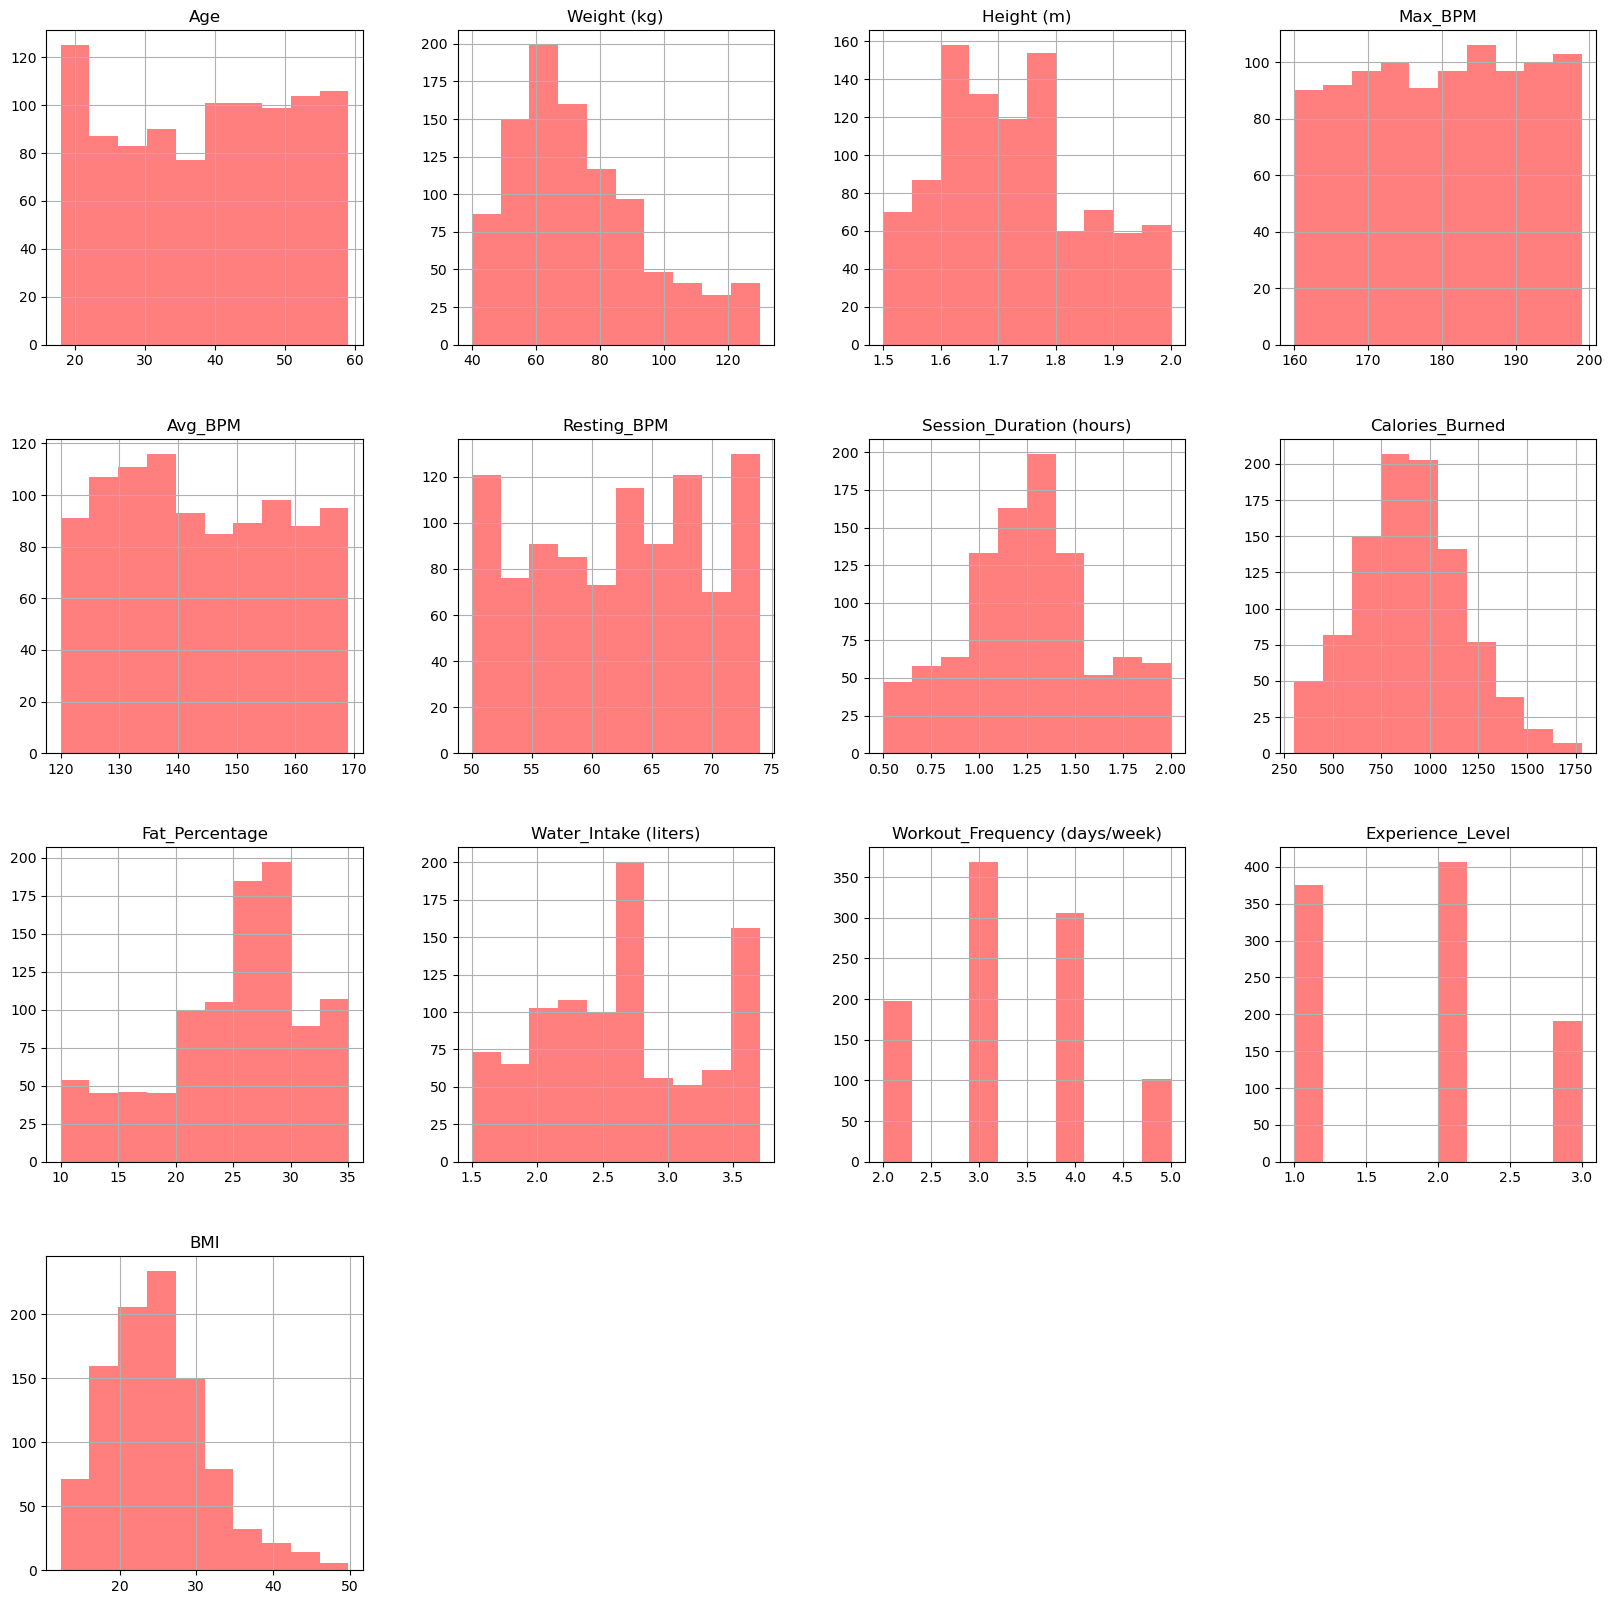

In [18]:
import matplotlib.pyplot as plt
data.hist(alpha=0.5, figsize=(20, 20), color='red')
plt.show()

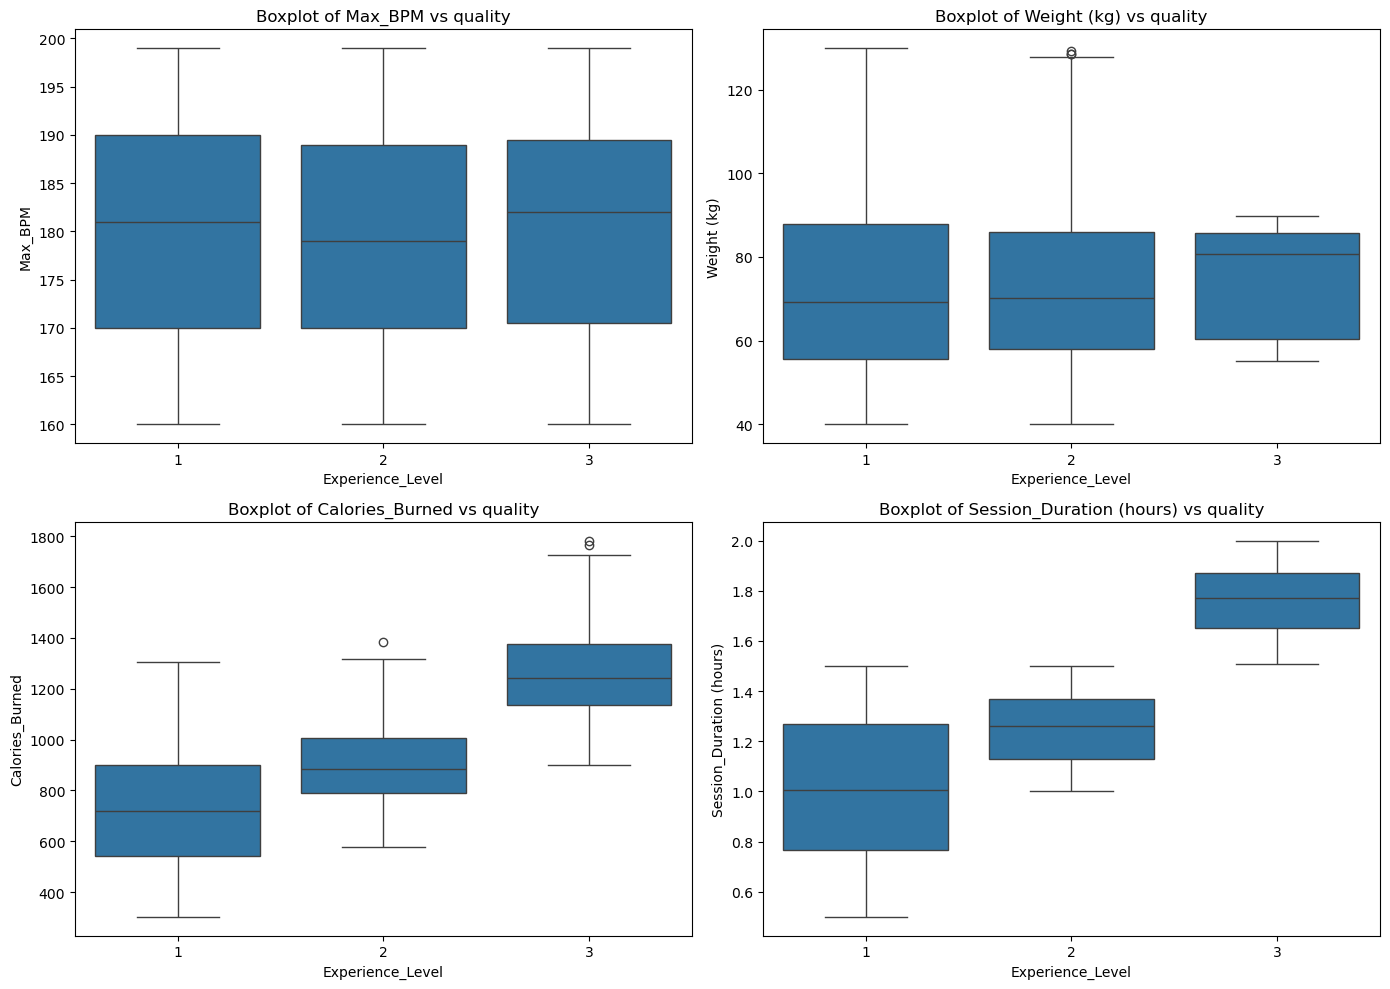

In [67]:
plt.figure(figsize=(14, 10))

y = data['Experience_Level']

for i, feature in enumerate(['Max_BPM', 'Weight (kg)', 'Calories_Burned', "Session_Duration (hours)"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=y, y=data[feature])
    plt.title(f'Boxplot of {feature} vs quality')

plt.tight_layout()
plt.show()

In [68]:
X = data[['Max_BPM', 'Weight (kg)']]
y = data['Experience_Level']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [71]:
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': range(1, 31)} 
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)
print(f'Best kNN parameters: {knn_grid.best_params_}')
score_knn = accuracy_score(y_test, y_pred_knn)
print(f'kNN Accuracy: {score_knn}')

Best kNN parameters: {'n_neighbors': 4}
kNN Accuracy: 0.46406570841889117


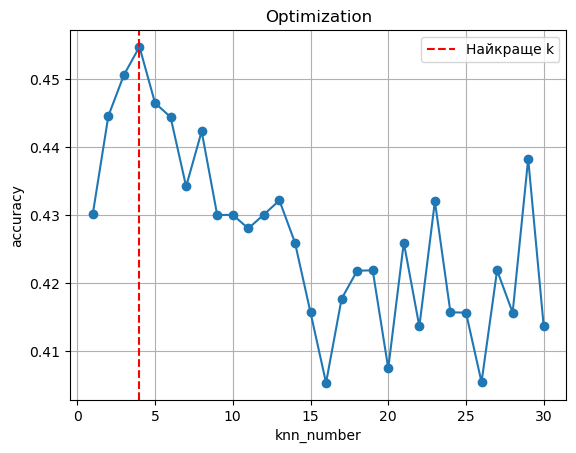

In [72]:
plt.plot(knn_grid.cv_results_['param_n_neighbors'], knn_grid.cv_results_['mean_test_score'], marker='o')
plt.axvline(knn_grid.best_params_['n_neighbors'], color='red', linestyle='--', label='Найкраще k')
plt.xlabel('knn_number')
plt.ylabel('accuracy')
plt.title('Optimization')
plt.grid()
plt.legend()
plt.show()

Decision Tree Accuracy: 0.486652977412731


/home/teebeeaf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


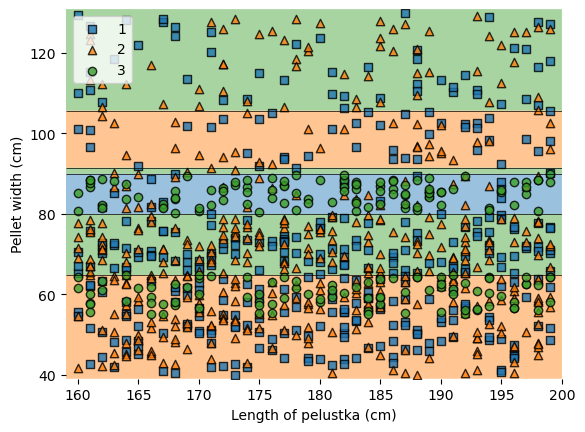

In [73]:
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

score_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {score_tree}')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, tree)
plt.xlabel('Length of pelustka (cm)')
plt.ylabel('Pellet width (cm)')
plt.legend(loc='upper left')
plt.show()

In [74]:
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_

y_pred_svm = best_svm.predict(X_test_scaled)
print(f'Best SVM parameters: {svm_grid.best_params_}')
score_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {score_svm}')

Best SVM parameters: {'C': 100, 'gamma': 1}
SVM Accuracy: 0.49691991786447637


Random Forest Accuracy: 0.486652977412731


/home/teebeeaf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


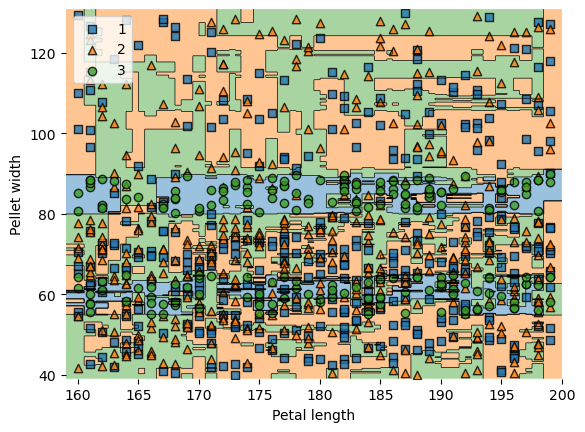

In [75]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2) 
forest.fit(X_train, y_train)

y_pred_forest = tree.predict(X_test)

score_forest = accuracy_score(y_test, y_pred_forest)
print(f'Random Forest Accuracy: {score_forest}')

plot_decision_regions(X_combined, y_combined, forest) 
plt.xlabel('Petal length') 
plt.ylabel('Pellet width') 
plt.legend(loc='upper left') 
plt.show()

In [76]:
ada = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

score_ada = accuracy_score(y_test, y_pred_ada)
print(f'AdaBoost Accuracy: {score_ada}')

AdaBoost Accuracy: 0.40451745379876797


/home/teebeeaf/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [77]:
df_compare = pd.DataFrame(columns = ['Accuracy Score'], index = ['kNN', 'Decision Tree', 'SVM', 'Random Forest', 'AdaBoost'])

df_compare.at['kNN', 'Accuracy Score'] = score_knn
df_compare.at['Decision Tree', 'Accuracy Score'] = score_tree
df_compare.at['SVM', 'Accuracy Score'] = score_svm
df_compare.at['Random Forest', 'Accuracy Score'] = score_forest
df_compare.at['AdaBoost', 'Accuracy Score'] = score_ada

df_compare

,Accuracy Score
kNN,0.464066
Decision Tree,0.486653
SVM,0.49692
Random Forest,0.486653
AdaBoost,0.404517


In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

best_pred = y_pred_tree

# classification report і confusion matrix
print("Classification Report:")
print(classification_report(y_test, best_pred, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test, best_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.52      0.45       188
           2       0.50      0.42      0.46       203
           3       0.75      0.56      0.64        96

    accuracy                           0.49       487
   macro avg       0.55      0.50      0.52       487
weighted avg       0.51      0.49      0.49       487

Confusion Matrix:
[[ 97  85   6]
 [105  86  12]
 [ 40   2  54]]
